# Analyse du Marketing Bancaire

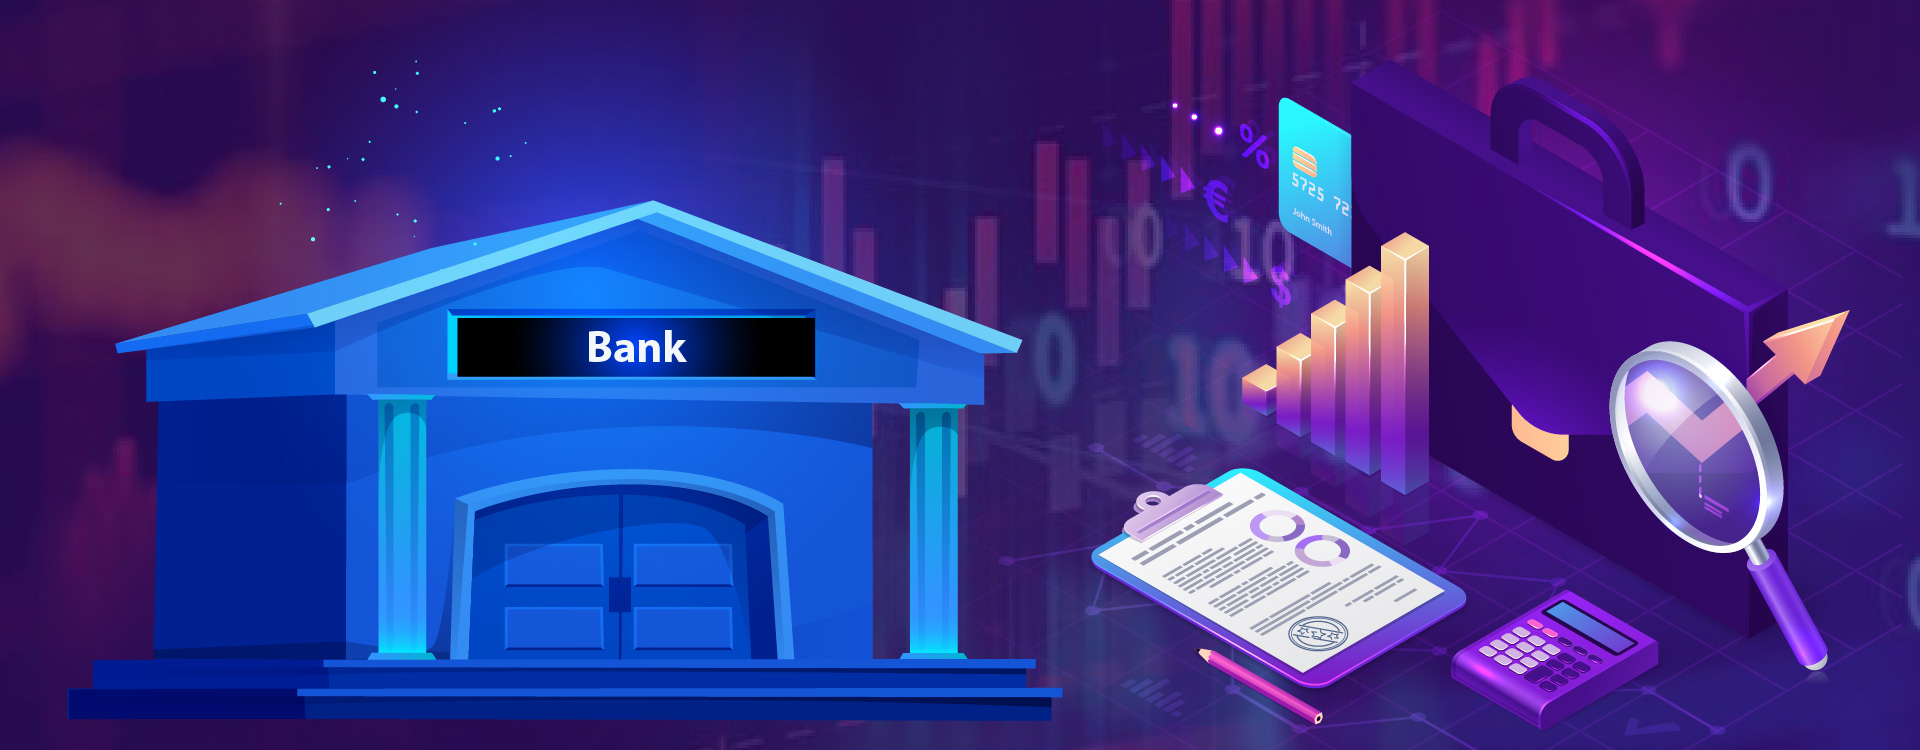

## Introduction

Aujourd'hui, les entreprises qui recrutent des data scientists s'intéressent particulièrement au portfolio des candidats. L'analyse des données marketing d'une organisation est l'une des applications les plus typiques de la data science et du machine learning. Une telle analyse constituera sans aucun doute une belle contribution au portfolio. En général, les ensembles de données contenant des informations marketing peuvent être utilisés pour deux objectifs commerciaux différents :

1. Prédiction des résultats de la campagne marketing pour chaque client et clarification des facteurs qui influencent ces résultats. Cela aide à découvrir des moyens de rendre les campagnes marketing plus efficaces.
2. Identification des segments de clients, en utilisant les données des clients qui ont souscrit à un dépôt à terme. Cela permet d’identifier le profil du client le plus susceptible d'acquérir le produit et de développer des campagnes marketing plus ciblées.

## Approche

Afin d'optimiser les campagnes marketing à l'aide de l'ensemble de données, nous devrons suivre les étapes suivantes :

1. Importer les données de l'ensemble de données et effectuer une analyse initiale de haut niveau : examiner le nombre de lignes, les valeurs manquantes, les colonnes de l'ensemble de données ainsi que leurs valeurs par rapport aux résultats de la campagne.
2. Nettoyer les données : supprimer les colonnes non pertinentes, gérer les valeurs manquantes et incorrectes, transformer les colonnes catégorielles en variables indicatrices (dummy variables).
3. Utiliser des techniques de machine learning pour prédire les résultats de la campagne marketing et identifier les facteurs qui influencent le succès de la campagne.

In [134]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from plotly.subplots import make_subplots
import chart_studio
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
from plotly import tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold

chart_studio.tools.set_credentials_file(username='Username', api_key='API_kAY')
# Initialize cufflinks and Plotly offline mode
cf.go_offline(connected=True)
init_notebook_mode(connected=True)


1. **Data Manipulation**:
   - `numpy`: Useful for numerical computations, especially for handling arrays and performing linear algebra operations.
   - `pandas`: A powerful library for data manipulation and analysis, particularly useful for working with tabular data.

2. **Visualization**:
   - `matplotlib.pyplot`: A basic plotting library for creating static, interactive, and animated visualizations.
   - `seaborn`: Built on top of `matplotlib`, it provides a high-level interface for drawing attractive statistical graphics.
   - `plotly`: A dynamic, interactive graphing library. You are also using Plotly via `chart_studio`, which allows publishing of interactive plots on the web.

3. **Machine Learning**:
   - `RandomForestClassifier`, `AdaBoostClassifier`, `GradientBoostingClassifier`: Popular machine learning algorithms based on ensemble learning techniques.
   - `SVC`: Support Vector Classification from the SVM (Support Vector Machine) algorithm.
   - `KNeighborsClassifier`: Implements the k-nearest neighbors algorithm for classification tasks.
   - `GaussianNB`: Implements the Gaussian Naive Bayes algorithm for classification.
   - `xgboost`: An optimized gradient boosting library widely used in competitions and for efficient, scalable implementations.
   
4. **Model Selection**:
   - `train_test_split`: A utility from `sklearn` to split data into training and testing sets.
   - `StratifiedKFold`: Helps in splitting the dataset into K folds, ensuring that each fold contains a balanced number of samples from each class.
   - `RandomizedSearchCV` and `GridSearchCV`: Tools for hyperparameter tuning. They help find the best parameters for machine learning models by searching over a grid or through random sampling.

5. **Plotly and Cufflinks Configuration**:
   - You’re setting up `chart_studio` to connect Plotly with your online account using your credentials. This enables you to save and share plots in an interactive format.
   - `cf.go_offline(connected=True)`: Initializes Cufflinks for offline use with Plotly.
   - `init_notebook_mode(connected=True)`: Ensures that Plotly works in offline mode within Jupyter notebooks.


## Importer les données

Tout d'abord, pour effectuer l'analyse, nous devons importer les données :


In [88]:
# Importer les données à partir de l'ensemble de données
data = pd.read_csv('./data/dataset.csv')

# Afficher les premières lignes de l'ensemble de données
print(data.head())

# Afficher les informations générales sur l'ensemble de données
print(data.info())

# Afficher les statistiques descriptives de l'ensemble de données
print(data.describe())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

In [89]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


## Exploration des données

Après avoir importé l'ensemble de données, nous devons examiner le nombre total de lignes dans l'ensemble de données et analyser le nombre de valeurs manquantes.


In [90]:
# Afficher le nombre total de lignes dans l'ensemble de données
total_rows = data.shape[0]
print(f"Nombre total de lignes : {total_rows}")

# Analyser le nombre de valeurs manquantes dans chaque colonne
missing_values = data.isnull().sum()
print("Nombre de valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

Nombre total de lignes : 11162
Nombre de valeurs manquantes par colonne :
Series([], dtype: int64)


In [91]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_values = data.isnull().mean() * 100

# Afficher le pourcentage de valeurs manquantes par colonne
print("Pourcentage de valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

# Somme des pourcentages de valeurs manquantes
total_missing_percentage = missing_values.sum()
print(f"Pourcentage total de valeurs manquantes : {total_missing_percentage}%")


Pourcentage de valeurs manquantes par colonne :
Series([], dtype: float64)
Pourcentage total de valeurs manquantes : 0.0%


### Exploration des colonnes catégorielles


Dans l'ensemble de données, nous avons à la fois des colonnes catégorielles et numériques. Examinons d'abord les valeurs des colonnes catégorielles.



In [92]:
# Définir les colonnes catégorielles
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Créer des sous-graphiques
fig = make_subplots(rows=3, cols=3, subplot_titles=cat_columns)
counter = 0

# Boucle à travers les colonnes catégorielles pour créer des graphiques à barres
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace = go.Bar(
        x=value_counts.index,
        y=value_counts.values,
        name=cat_column
    )
    
    trace_x = counter // 3 + 1
    trace_y = counter % 3 + 1
    
    fig.add_trace(trace, row=trace_x, col=trace_y)
    
    counter += 1

# Mettre à jour la mise en page et afficher le graphique
fig.update_layout(height=850, width=1000, title='Valeurs des colonnes catégorielles')
py.iplot(fig, filename='valeurs_colonnes_categorielle')

### Exploration des colonnes numériques


Maintenant, examinons les valeurs des colonnes numériques. La manière la plus pratique d'observer les valeurs numériques est de tracer des histogrammes.

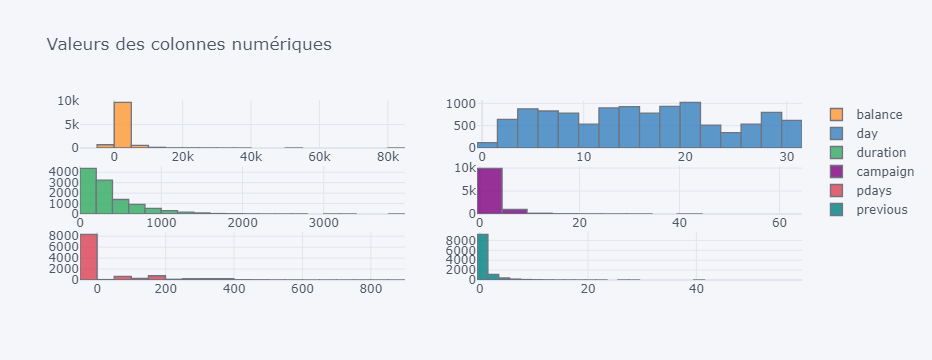

In [93]:
# Sélectionner les colonnes numériques
df_num = data[['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

# Configurer Cufflinks pour l'affichage en ligne
cf.set_config_file(offline=False, world_readable=True, theme='pearl')

# Tracer les histogrammes pour les colonnes numériques
df_num.iplot(kind='histogram', subplots=True, shape=(3, 2), bins=30, filename='valeurs_colonnes_numeriques',
             title='Valeurs des colonnes numériques')


Nous pouvons voir que les colonnes numériques présentent des valeurs aberrantes (en particulier les colonnes 'pdays', 'campaign' et 'previous'). Il est possible qu'il y ait des valeurs incorrectes (données bruyantes), donc nous devrions examiner de plus près les données et décider comment gérer ce bruit.

Examinons de plus près les valeurs des colonnes 'campaign', 'pdays' et 'previous' :

In [94]:
data[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


<Axes: ylabel='Frequency'>

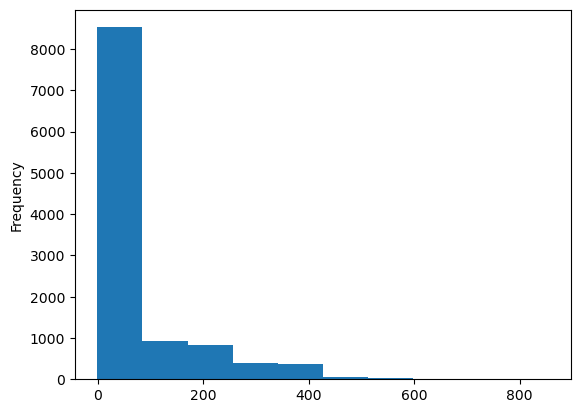

In [95]:
data['pdays'].plot.hist()

Pourcentage des valeurs de 'pdays' supérieures à 200 :

In [96]:
len (data[data['pdays'] > 200] ) / len(data) * 100

9.12022934957893

Pourcentage des valeurs de 'pdays' supérieures à 300 :

In [97]:
len (data[data['pdays'] > 300] ) / len(data) * 100

5.81437018455474

Pourcentage des valeurs de 'pdays' supérieures à 400 :

In [98]:
len (data[data['pdays'] > 400] ) / len(data) * 100

1.2005017022039062

"'pdays' représente le nombre de jours écoulés depuis le dernier contact avec le client lors d'une campagne précédente. En examinant de plus près les données de 'pdays', nous pouvons constater que :
* seulement 1,2 % des valeurs sont supérieures à 400. Ce sont probablement des valeurs aberrantes, donc nous devrions envisager d'imputer une valeur (peut-être la valeur moyenne) à la place de ces valeurs.
* -1 signifie probablement que le client n'a pas été contacté auparavant ou représente des données manquantes.

Étant donné que nous ne sommes pas sûrs de la signification exacte de -1, je suggère de supprimer cette colonne, car -1 représente plus de 50 % des valeurs de la colonne."

<Axes: ylabel='Frequency'>

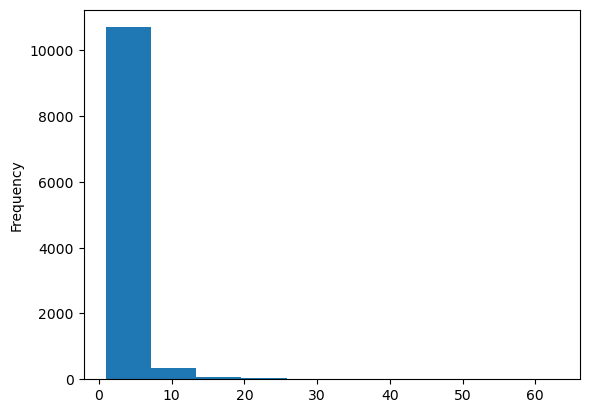

In [99]:
data['campaign'].plot.hist()

Pourcentage des valeurs de 'campaign' supérieures à 20 :

In [100]:
len (data[data['campaign'] > 34] ) / len(data) * 100

0.035835871707579285

'campaign' représente le nombre de contacts effectués lors de cette campagne et pour ce client (numérique, incluant le dernier contact). Les nombres pour 'campaign' supérieurs à 34 sont clairement du bruit, donc je suggère de les imputer avec les valeurs moyennes de la campagne lors du nettoyage des données.

<Axes: ylabel='Frequency'>

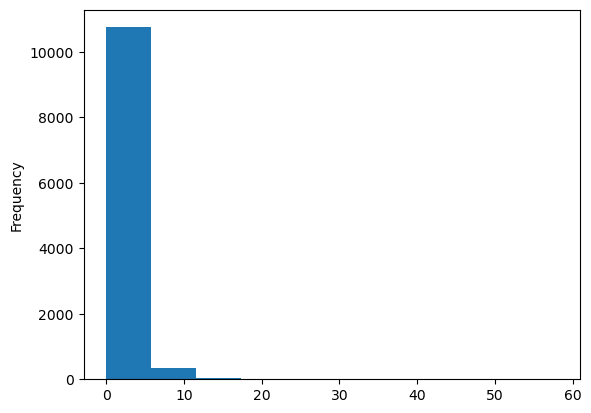

In [101]:
data['previous'].plot.hist()

In [102]:
len (data[data['previous'] > 34] ) / len(data) * 100

0.04479483963447411

'previous' représente le nombre de contacts effectués avant cette campagne et pour ce client (numérique). Les nombres pour 'previous' supérieurs à 34 sont également très étranges, donc je suggère de les imputer avec les valeurs moyennes de la campagne lors du nettoyage des données.

### Analyse de la colonne de réponse

Il est très important d'examiner la colonne de réponse, qui contient les informations que nous allons prédire. Dans notre cas, nous devons examiner la colonne 'deposit' et comparer ses valeurs avec celles des autres colonnes.

Tout d'abord, nous devons observer le nombre de valeurs 'yes' et 'no' dans la colonne de réponse 'deposit'.

In [103]:
value_counts = data['deposit'].value_counts()

data_ = [
    go.Bar(
        x=value_counts.index,
        y=value_counts.values,
        name = 'deposit'
    )
]

layout = go.Layout(
    title='Deposit values',
    height=300, width=600,
    xaxis=dict(
        title='Deposit',
        titlefont=dict(
            size=16,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Value counts',
        titlefont=dict(
            size=16,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data_, layout=layout)
py.iplot(fig, filename='deposit_bar_chart')

Dans le diagramme, nous constatons que les comptes pour les valeurs 'yes' et 'no' de 'deposit' sont proches, ce qui nous permet d'utiliser la précision comme métrique pour un modèle qui prédit le résultat de la campagne.

Voyons comment la valeur de la colonne 'deposit' varie en fonction des valeurs des autres colonnes catégorielles :

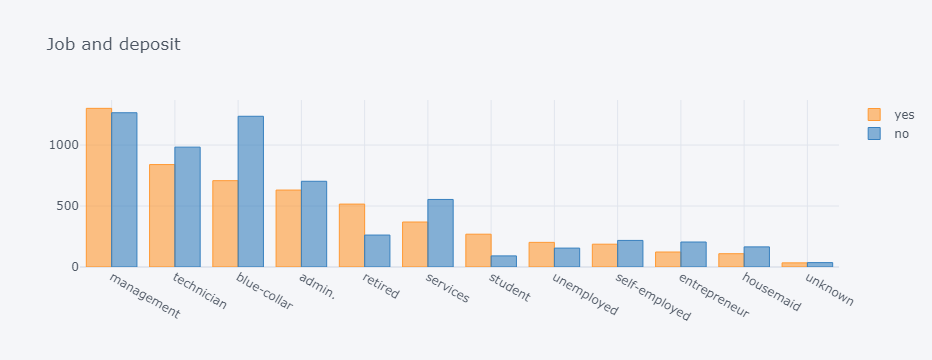

In [105]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['job'].value_counts()

j_df.iplot(kind = 'bar', title = 'Job and deposit')

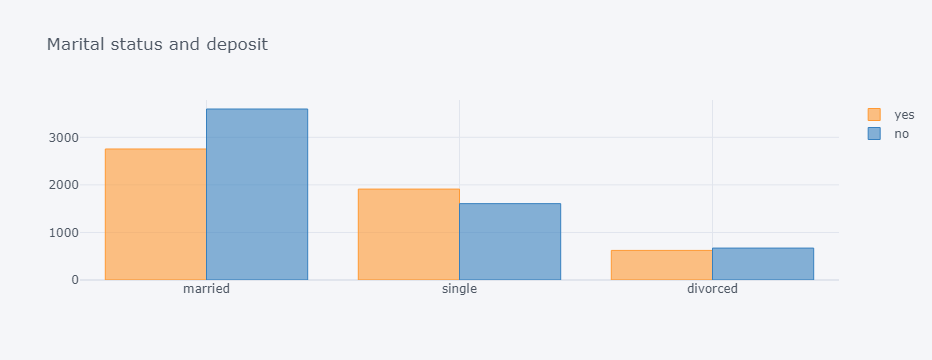

In [106]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['marital'].value_counts()

j_df.iplot(kind = 'bar', title = 'Marital status and deposit')

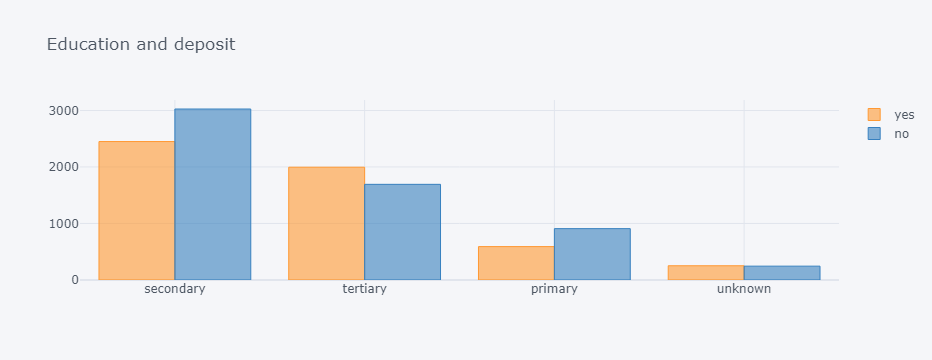

In [107]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['education'].value_counts()

j_df.iplot(kind = 'bar', title = 'Education and deposit')

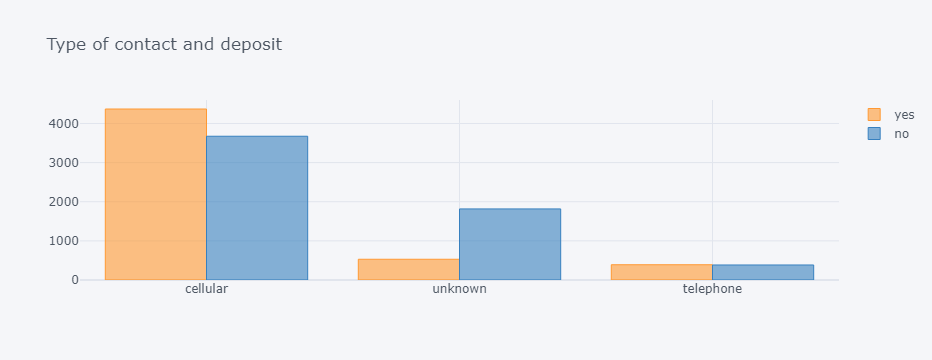

In [108]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['contact'].value_counts()

j_df.iplot(kind = 'bar', title = 'Type of contact and deposit')

En ce qui concerne les diagrammes, nous pouvons dire qu'en fonction de notre ensemble de données :
1. Les clients ayant des emplois de type 'blue-collar' et 'services' sont moins susceptibles de souscrire à un dépôt à terme.
2. Les clients mariés sont moins susceptibles de souscrire à un dépôt à terme.
3. Les clients contactés par 'cellulaire' sont moins susceptibles de souscrire à un dépôt à terme.

Maintenant, examinons comment les colonnes numériques affectent la souscription au dépôt à terme.

In [109]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (data[data['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (data[data['deposit'] == 'no'][['deposit','balance']].describe())['balance']
b_df

,balance_yes,balance_no
count,5289.000000,5873.000000
mean,1804.267915,1280.227141
std,3501.104777,2933.411934
min,-3058.000000,-6847.000000
25%,210.000000,64.000000
50%,733.000000,414.000000
75%,2159.000000,1324.000000
max,81204.000000,66653.000000


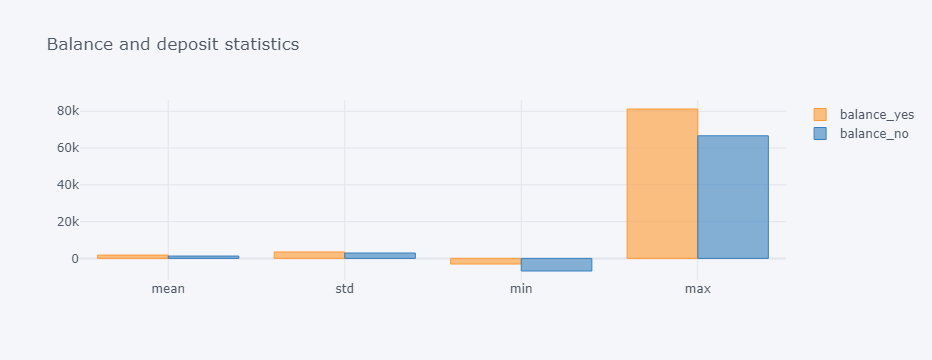

In [110]:
b_df.drop(['count', '25%', '50%', '75%']).iplot(kind = 'bar', title = 'Balance and deposit statistics')

In [111]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (data[data['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (data[data['deposit'] == 'no'][['deposit','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,5873.000000
mean,41.670070,40.837391
std,13.497781,10.264815
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,89.000000


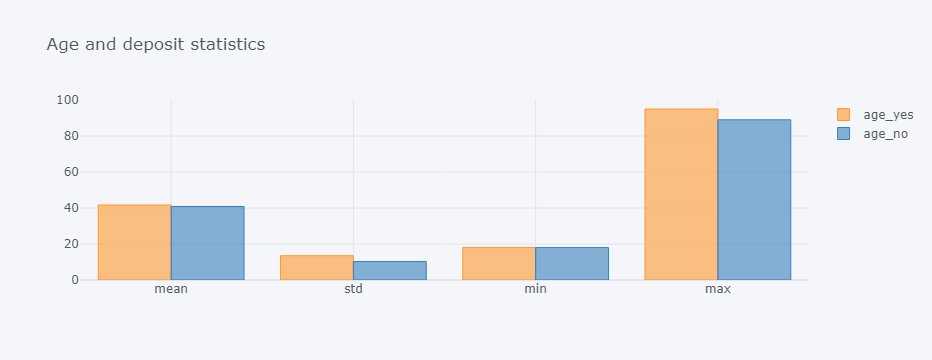

In [112]:
a_df.drop(['count', '25%', '50%', '75%']).iplot(kind = 'bar', title = 'Age and deposit statistics')

In [113]:
#number of contacts performed during this campaign ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (data[data['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
c_df['campaign_no'] = (data[data['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,5873.000000
mean,2.141047,2.839264
std,1.921826,3.244474
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


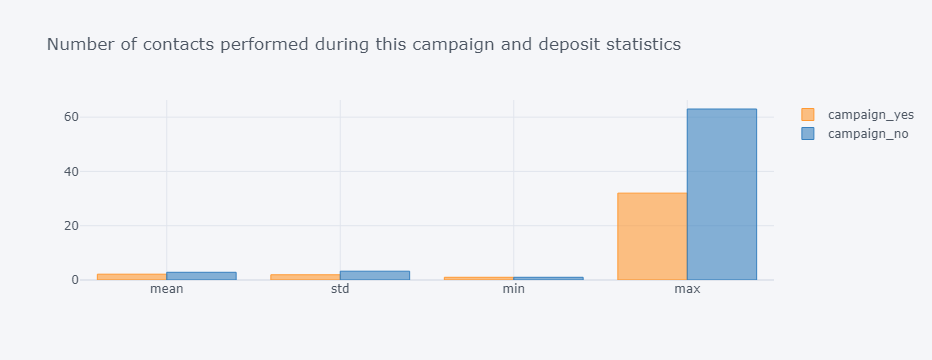

In [114]:
c_df.drop(['count', '25%', '50%', '75%']).iplot(kind = 'bar', title = 'Number of contacts performed during this campaign and deposit statistics')

In [115]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (data[data['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
p_df['previous_no'] = (data[data['deposit'] == 'no'][['deposit','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,5873.00000
mean,1.170354,0.52835
std,2.553272,1.97961
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,0.00000
max,58.000000,41.00000


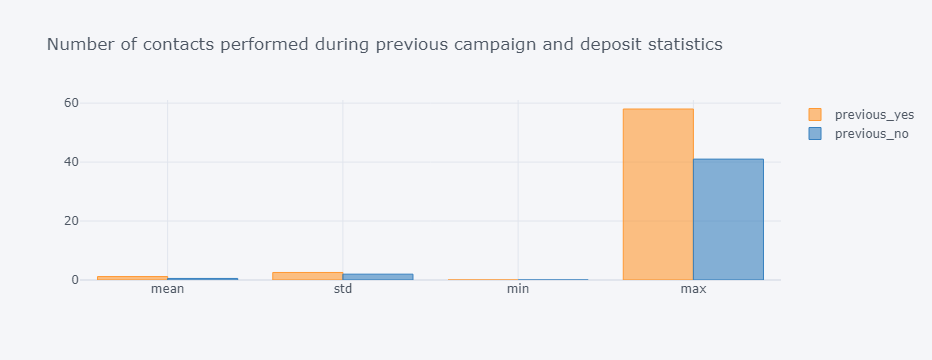

In [116]:
p_df.drop(['count', '25%', '50%', '75%']).iplot(kind = 'bar', title = 'Number of contacts performed during previous campaign and deposit statistics')

En regardant les diagrammes ci-dessus, nous pouvons conclure que :
1. Les personnes qui ont souscrit à un dépôt à terme tendent à avoir des valeurs de solde et d'âge plus élevées.
2. Les personnes qui ont souscrit à un dépôt à terme tendent à avoir un nombre de contacts inférieur durant cette campagne.

## Nettoyage des Données


Avant de pouvoir appliquer des techniques d'apprentissage automatique, nous devons préparer l'ensemble de données pour le traitement :

1. Convertir les colonnes avec des valeurs 'yes' et 'no' en colonnes booléennes.
2. Convertir les colonnes catégorielles en variables indicatrices (dummy variables).

In [117]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, data):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = data[data[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(data):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = data.copy()
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = data.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    
    #impute incorrect values and drop original columns
    cleaned_df['campaign_cleaned'] = data.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = data.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [118]:
#clean the dataset
cleaned_df = clean_data(data)
cleaned_df.head()

,age,balance,day,duration,default_bool,housing_bool,loan_bool,deposit_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,2343,5,1042,0,1,0,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
1,56,45,5,1467,0,0,0,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
2,41,1270,5,1389,0,1,0,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
3,55,2476,5,579,0,1,0,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
4,54,184,5,673,0,0,0,1,False,False,...,False,True,False,False,False,False,False,True,2.0,0.0


## Apprentissage Automatique pour la Prédiction du Résultat de la Campagne

Maintenant, utilisons les ensembles de données nettoyés pour prédire le résultat de la campagne à l'aide de modèles de classification d'apprentissage automatique. J'utiliserai XGBoost, qui est l'une des bibliothèques d'apprentissage automatique les plus courantes pour la modélisation.
<br> Le modèle résultant m'aidera également à comprendre quelles caractéristiques ont la plus grande importance pour la prédiction des résultats de la campagne.

Créons les ensembles de données X et y pour entraîner le modèle et divisons-les en ensembles de données d'entraînement et de test.

In [120]:
X = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

In [121]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

Entraîner le modèle de classificateur XGBoost :

In [123]:
# Entraîner le modèle XGBoost
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                             colsample_bytree=1, max_depth=7)
xgb.fit(X_train, y_train.squeeze().values)

# Calculer et afficher les scores du modèle pour les 15 meilleures caractéristiques
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('Score de précision XGB pour l\'ensemble d\'entraînement : %.3f, ensemble de test : %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))


Score de précision XGB pour l'ensemble d'entraînement : 0.917, ensemble de test : 0.848


Obtenir les importances des caractéristiques du modèle entraîné :

In [124]:
# Obtenir les importances des caractéristiques du modèle
headers = ["nom", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns=headers)

# Tracer les importances des caractéristiques
trace1 = go.Bar(x=xgb_feature_importances['nom'],
                 y=xgb_feature_importances['score'])
                                               
data = go.Data([trace1])
layout = go.Layout(title="Importances des Caractéristiques (XGB)", yaxis={'title': 'scores'})
figure = go.Figure(data=data, layout=layout)
py.iplot(figure, filename='importances_des_caracteristiques')

C:\Users\asus\anaconda3\envs\tfvenv\Lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




Comme nous pouvons le voir dans le diagramme montrant les importances des caractéristiques, les caractéristiques les plus importantes sont :
* Le solde du compte du client,
* L'âge du client,
* Le nombre de contacts effectués durant cette campagne et la durée du contact,
* Le nombre de contacts effectués avant cette campagne.

Ainsi, les principaux résultats de la modélisation sont :
* Les clients plus âgés sont plus susceptibles de souscrire à un dépôt à terme.
* Les clients ayant un solde de compte plus élevé sont plus susceptibles de souscrire à un dépôt à terme.
* Le nombre de contacts avec les clients est vraiment important. Trop de contacts avec le client pourrait le pousser à décliner l'offre.

Essayons de formuler des recommandations plus spécifiques :

1. Déterminer le solde du compte sur lequel la campagne marketing devrait se concentrer :

In [125]:
df_new = cleaned_df.copy()

# Introduire une nouvelle colonne 'balance_buckets'
df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates='drop')

# Grouper par 'balance_buckets' et trouver le résultat moyen de la campagne par tranche de solde
mean_deposit = df_new.groupby(['balance_buckets'])['deposit_bool'].mean()

# Tracer le résultat moyen par tranche
trace = go.Scatter(
    x=mean_deposit.index,
    y=mean_deposit.values,
    mode='lines'
)
data = [trace]
layout = go.Layout(title="Résultat moyen en fonction du solde", yaxis={'title': 'résultat moyen'},
                   xaxis={'title': 'tranche de solde'})
figure = go.Figure(data=data, layout=layout)
py.iplot(figure, filename='scatter-des-tranches-de-solde')

In [126]:
df_new[df_new['balance_buckets'] == 34]['balance'].min()

1490

D'après le diagramme ci-dessus, nous pouvons conclure que les campagnes marketing devraient se concentrer sur les clients ayant un solde de compte supérieur à 1490 $.

2. Déterminer l'âge des clients sur lequel la campagne devrait se concentrer :

In [128]:
# Introduire une nouvelle colonne 'age_buckets'
df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates='drop')

# Grouper par 'age_buckets' et trouver le résultat moyen de la campagne par tranche d'âge
mean_age = df_new.groupby(['age_buckets'])['deposit_bool'].mean()

# Tracer le résultat moyen par tranche
trace = go.Scatter(
    x=mean_age.index,
    y=mean_age.values,
    mode='lines'
)
data = [trace]
layout = go.Layout(title="Résultat moyen en fonction de l'âge", yaxis={'title': 'résultat moyen'},
                   xaxis={'title': 'tranche d âge'})
figure = go.Figure(data=data, layout=layout)
py.iplot(figure, filename='scatter-des-tranches-d-age')


In [129]:
df_new[df_new['age_buckets'] == 3]['age'].max()

31

In [130]:
df_new[df_new['age_buckets'] == 17]['age'].min()

56

3. Déterminer le nombre approprié de contacts avec le client pendant la campagne :

In [131]:
# Introduire une nouvelle colonne 'campaign_buckets'
df_new['campaign_buckets'] = pd.qcut(df_new['campaign_cleaned'], 20, labels=False, duplicates='drop')

# Grouper par 'campaign_buckets' et trouver le résultat moyen de la campagne par tranche de contacts
mean_campaign = df_new.groupby(['campaign_buckets'])['deposit_bool'].mean()

# Tracer le résultat moyen par tranche
trace = go.Scatter(
    x=mean_campaign.index,
    y=mean_campaign.values,
    mode='lines'
)
data = [trace]
layout = go.Layout(title="Résultat moyen en fonction du nombre d'appels pendant la campagne", 
                   yaxis={'title': 'résultat moyen'},
                   xaxis={'title': 'tranche de campagne'})
figure = go.Figure(data=data, layout=layout)
py.iplot(figure, filename='scatter-des-tranches-de-campagne')


In [132]:
df_new[df_new['campaign_buckets'] == 2]['campaign_cleaned'].min()

4.0

### Empilement de modèles pour améliorer la précision

Une technique courante utilisée pour augmenter la précision des modèles est l'empilement de modèles. Cette technique combine les informations de plusieurs modèles pour créer un nouveau modèle.

In [133]:
"""
Classe pour encapsuler le classificateur Sklearn afin de passer différents
classificateurs à la fonction de pliage
"""
class SklearnHelper(object):
    """ 
    Fonction d'initialisation
    
    ENTRÉE
        clf - classificateur sklearn
        seed - graine aléatoire
        params - dictionnaire contenant les paramètres pour le classificateur clf
    """
    def __init__(self, clf, seed=42, params=None):
        #params['random_state'] = seed
        self.clf = clf(**params)

    """
    Wrapper pour la fonction d'entraînement
    
    ENTRÉE
        x_train - ensemble d'entraînement
        y_train - vecteur de réponse pour l'ensemble d'entraînement
        
    RETOURNE
        modèle entraîné
    """
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    """
    Wrapper pour la fonction de prédiction
    
    ENTRÉE
        x - ensemble d'entraînement
        
    RETOURNE
        vecteur de réponse prédit pour x
    """
    def predict(self, x):
        return self.clf.predict(x)
    
    """
    Wrapper pour la fonction d'importances des caractéristiques
    
    ENTRÉE
        x - ensemble d'entraînement
        y  - vecteur de réponse pour l'ensemble d'entraînement
        
    RETOURNE
        importances des caractéristiques pour le modèle entraîné utilisant x et y
    """
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)


In [135]:
NFOLDS = 5
SEED = 42

def get_oof(clf, x_train, y_train, x_test, nfolds=NFOLDS, seed=SEED):
    arg = {'n_splits': nfolds, 'shuffle': True, 'random_state': seed}
    kf = KFold(**arg)
    
    oof_train = np.zeros((x_train.shape[0],))
    oof_test = np.zeros((x_test.shape[0],))
    oof_test_skf = np.empty((nfolds, x_test.shape[0]))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.iloc[train_index]
        y_tr = y_train[train_index]
        x_te = x_train.iloc[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)


"Nous allons entraîner quelques modèles de classification différents et combiner leurs résultats pour créer un modèle de niveau 2 :

1. Classificateur Random Forest :"

In [136]:
# Définir les paramètres du Random Forest
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'verbose': 0
}

# Initialiser la classe d'assistance
rf = SklearnHelper(clf=RandomForestClassifier, seed=42, params=rf_params)

# Effectuer l'entraînement hors échantillon (out-of-fold)
rf_oof_train, rf_oof_test = get_oof(rf, X_train, y_train.squeeze().values, X_test)


2. Classificateur AdaBoost :

In [137]:
# Définir les paramètres d'AdaBoost
ada_params = {
    'n_estimators': 500,
    'learning_rate': 0.75,
    'algorithm': 'SAMME'  # Défini sur SAMME pour éviter l'avertissement
}

# Initialiser la classe d'aide
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)

In [138]:
# Effectuer l'entraînement hors des plis
ada_oof_train, ada_oof_test = get_oof(ada, X_train, y_train.squeeze().values, X_test)


3. Gradient Boosting classifier

In [139]:
# Définir les paramètres du Gradient Boosting
gb_params = {
    'n_estimators': 500,
    #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Initialiser la classe d'aide
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)

# Effectuer l'entraînement hors des plis
gb_oof_train, gb_oof_test = get_oof(gb, X_train, y_train.squeeze().values, X_test)


4. SVM Classifier

In [ ]:
# Définir les paramètres du classificateur à vecteurs de support
svc_params = {
    'kernel': 'linear',
    'C': 0.025
}

# Initialiser la classe d'aide
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

# Effectuer l'entraînement hors des plis
svc_oof_train, svc_oof_test = get_oof(svc, X_train, y_train.squeeze().values, X_test)

In [ ]:
4. knn Classifier

In [ ]:
# Définir les paramètres du classificateur KNN
knn_params = {
    'n_neighbors': 3
}

# Initialiser la classe d'aide
knn = SklearnHelper(clf=KNeighborsClassifier, seed=SEED, params=knn_params)

# Effectuer l'entraînement hors des plis
knn_oof_train, knn_oof_test = get_oof(knn, X_train, y_train.squeeze().values, X_test)


6. Naive Bayes Classifier

In [ ]:
# Définir les paramètres du classificateur Naive Bayes
nb_params = {
    'var_smoothing': 1e-09
}

# Initialiser la classe d'aide
nb = SklearnHelper(clf=GaussianNB, seed=SEED, params=nb_params)

# Effectuer l'entraînement hors des plis
nb_oof_train, nb_oof_test = get_oof(nb, X_train, y_train.squeeze().values, X_test)

Concaténer les résultats des modèles de niveau 1

In [ ]:
X_train_level2 = np.concatenate(( rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train, knn_oof_train, nb_oof_train), axis=1)
X_test_level2 = np.concatenate(( rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test, knn_oof_test, nb_oof_test), axis=1)

Utilisez le classificateur XGBoost comme modèle de niveau 2 et prédisez les résultats :

In [ ]:
# Définir la grille des paramètres
params = {
    'min_child_weight': [1, 2, 3, 5, 10],
    'gamma': [0.5, 0.7, 0.8, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [2, 3, 4, 5, 6, 7],
    'n_estimators': [100, 200, 300, 400, 500]
}

In [ ]:
# Initialiser le modèle XGBClassifier
gbm = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,  # Un nombre plus petit d'arbres
    max_depth=4,
    learning_rate=0.02,
    subsample=0.8,
    colsample_bytree=0.8
)

In [ ]:
# Définir le nombre de plis pour la validation croisée et le nombre de combinaisons de paramètres
folds = 3
param_comb = 300

# Mettre en place la validation croisée StratifiedKFold
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

# Effectuer RandomizedSearchCV
random_search = RandomizedSearchCV(
    gbm, 
    param_distributions=params, 
    n_iter=param_comb, 
    scoring='accuracy', 
    n_jobs=4, 
    cv=skf.split(X_train, y_train),  # Remplacer X_train et y_train par vos données réelles
    verbose=3, 
    random_state=1001
)

In [ ]:
# Ajuster RandomizedSearchCV
random_search.fit(X_train, y_train)  # Remplacer X_train et y_train par vos données réelles

# Afficher le meilleur estimateur
best_estimator = random_search.best_estimator_
print("Meilleur estimateur :", best_estimator)
print('\n Meilleur estimateur :')
print(random_search.best_estimator_)
print('\n Meilleur score de Gini normalisé pour une recherche à %d plis avec %d combinaisons de paramètres :' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Meilleurs hyperparamètres :')
print(random_search.best_params_)   

In [ ]:
gbm_best = xgboost.XGBClassifier(
    learning_rate=0.02,
    n_estimators=400,
    max_depth=7,
    min_child_weight=1,
    gamma=0.5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=-1,
    scale_pos_weight=1
)

gbm_best.fit(X_train_level2, y_train)

y_train_preds = gbm_best.predict(X_train_level2)
y_test_preds = gbm_best.predict(X_test_level2)

print('Score de précision du modèle de niveau 2 XGB pour l\'entraînement : %.3f, test : %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

# Comme nous pouvons le voir, le modèle de niveau-2 résultant surpasse le modèle initial :
# * Le score de précision sur le jeu de test est légèrement supérieur.
# * Le score de précision sur le jeu d'entraînement est légèrement inférieur, ce qui signifie que le modèle de niveau-2 résultant est moins susceptible d'être surajusté.

## Conclusion

Les principaux résultats de l'analyse sont les recommandations pour les futures campagnes marketing :
* Le solde du compte du client a une énorme influence sur l'issue de la campagne. Les personnes ayant un solde de compte supérieur à 1490 $ sont plus susceptibles de souscrire un dépôt à terme, il est donc recommandé de cibler ces clients à l'avenir.
* L'âge du client influence également l'issue de la campagne. Les futures campagnes devraient se concentrer sur les clients des catégories d'âge inférieures à 30 ans et supérieures à 50 ans.
* Le nombre de contacts avec le client durant la campagne est également très important. Le nombre de contacts avec le client ne devrait pas dépasser 4.